In [36]:
A = 7
V = 1.5
s = 0.02
k = 0.45
A11 = 2.694e11
A12 = 1.3e47
T11 = 70225/8.314
T12 = 283356/8.314
A21 = 0.5*2.694e11
A22 = 0.5*1.3e47
T21 = 1.06*T11
T22 = 1.06*T12
C = (0.9*4.14e6 + 0.1*4167460)
c = 3.58e3
m = 30
B1max = 0.15*0.5
B10 = 0.045*0.5
B2max = 0.15*0.5
B20 = 0.045*0.5
Qb = 1e6
U = 1/(1/50 + 1/5000 + s/k)
var('T', 't', 'B1', 'B2')

(T, t, B1, B2)

In [37]:
mu1(T) = (A11*exp(-T11/T))/(1 + A12*exp(-T12/T))
mu2(T) = (A21*exp(-T21/T))/(1 + A22*exp(-T22/T))
Ta(t) = 0.5*(273 + 20 + 273 + 5) + 0.5*(20 - 5)*sin(2*pi*t/24)
dQc(T, t) = -(k*A/s) * (T - Ta(t))
dQ1b(T, B1, t) = m*Qb*mu1(T)*B1*(1 - B1/B1max)
dQ2b(T, B2, t) = m*Qb*mu2(T)*B2*(1 - B2/B2max)
ts = srange(0, 200, 0.01)

In [38]:
dT = (dQc(T,t) + dQ1b(T,B1,t) + dQ2b(T,B2,t))/(m*c)
dB1 = mu1(T)*B1*(1 - B1/B1max)
dB2 = mu2(T)*B2*(1 - B2/B2max)

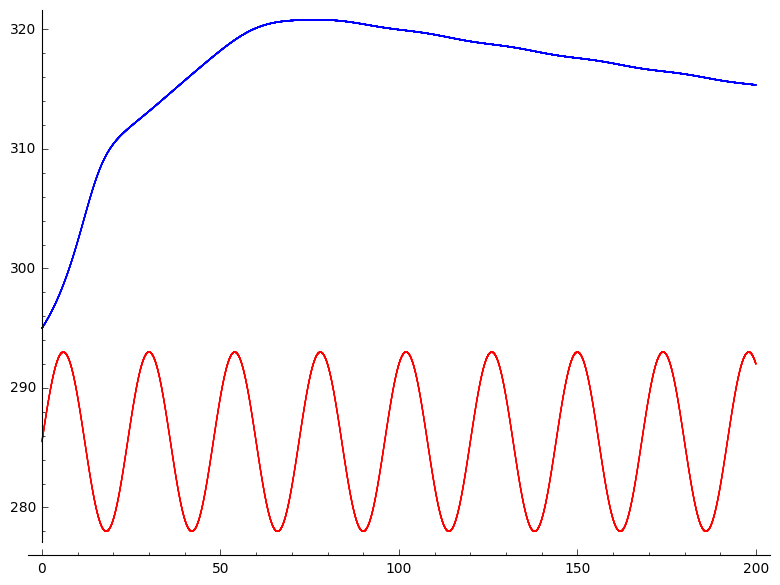

In [39]:
result = desolve_odeint([dT, dB1, dB2], [295, B10, B20], ts, [T,B1,B2], ivar=t)
Ts = result[:,0]
B1s = result[:,1]
B2s = result[:,2]
list_plot(zip(ts,Ts), size = 1) + list_plot(zip(ts, map(Ta, ts)), size = 1, color = 'red')

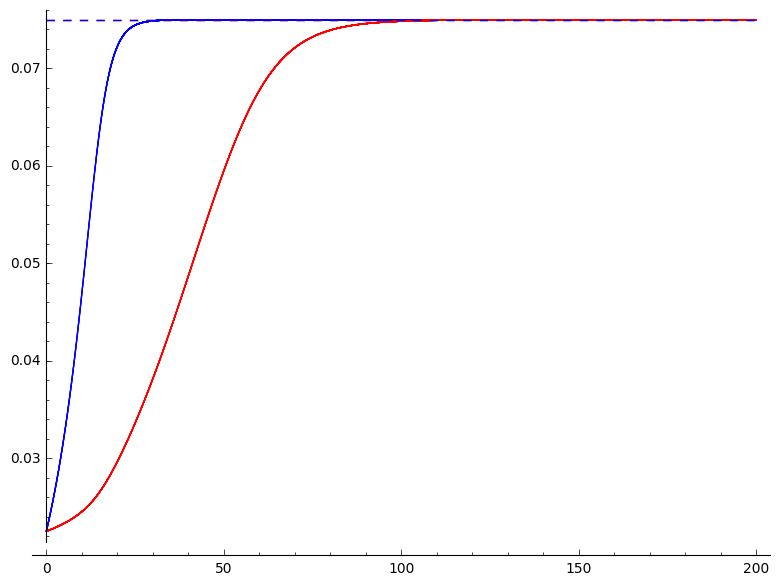

In [40]:
list_plot(zip(ts, B1s), size = 1) \
+ list_plot(zip(ts, B2s), size = 1, color = 'red') \
+ plot(B2max, xmin = 0, xmax = 200, color = 'red', linestyle = '--') \
+ plot(B1max, xmin = 0, xmax = 200, linestyle = '--')

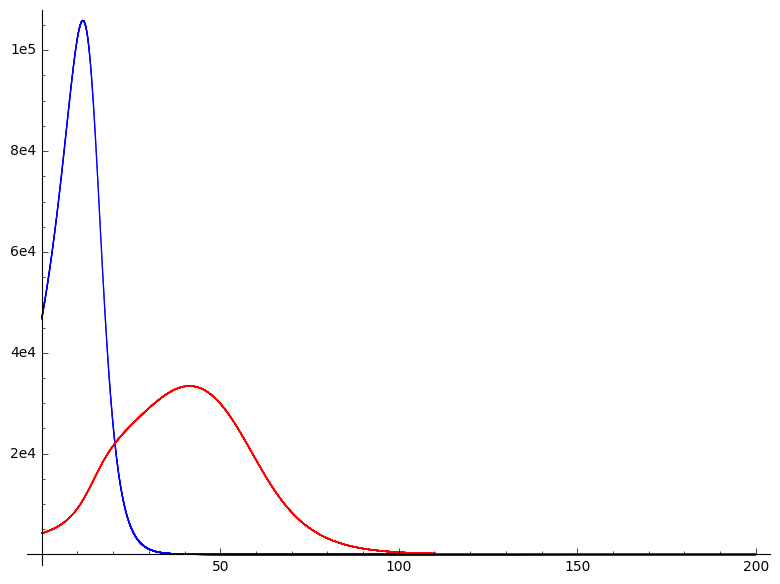

In [41]:
dQ1bs = map(lambda T, B1, t: dQ1b(T, B1, t), Ts, B1s, ts)
dQ2bs = map(lambda T, B2, t: dQ2b(T, B2, t), Ts, B2s, ts)
list_plot(zip(ts, dQ1bs), size = 1) \
+ list_plot(zip(ts, dQ2bs), size = 1, color = 'red')

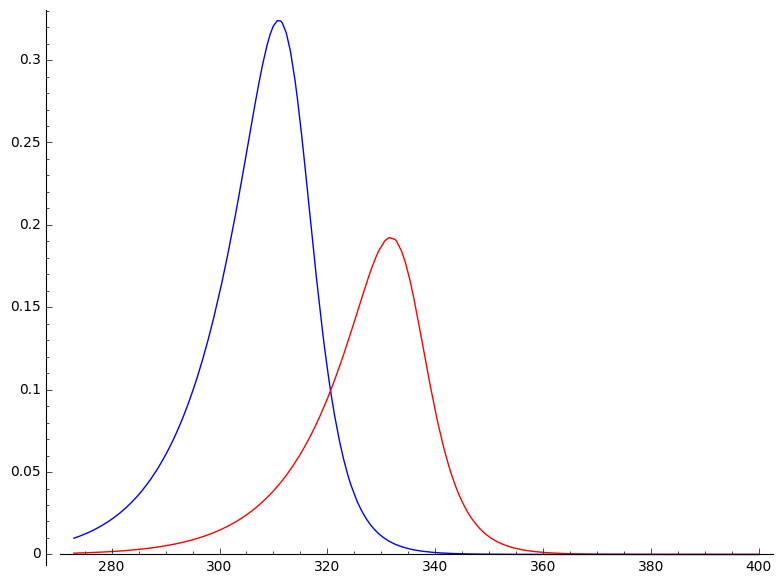

In [42]:
plot(mu1(T), xmin = 273, xmax = 400) \
+ plot(mu2(T), xmin = 273, xmax = 400, color = 'red')